<a href="https://colab.research.google.com/github/mr0112358/SDL-Course/blob/master/SDL_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# The CIFAR10 small images dataset, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_train type:', type(y_test[0,0]))
# Change types of x_train and x_test
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 10)
y_train type: <class 'numpy.float32'>


In [19]:
# data_augmentation
batch_size = 32

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)
# Store the generator by datagen.flow
data_batches_gen = datagen.flow(x_train, y_train, batch_size=batch_size)

## 1 (a)

In [20]:
# Original model CNN with dropout and relu activation in hidden layer
model_cnn_relu_dropout = Sequential()
model_cnn_relu_dropout.add(Conv2D(32, (3, 3), padding='same',
              input_shape=x_train.shape[1:]))
model_cnn_relu_dropout.add(Activation('relu'))
model_cnn_relu_dropout.add(Conv2D(32, (3, 3)))
model_cnn_relu_dropout.add(Activation('relu'))
model_cnn_relu_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_relu_dropout.add(Dropout(0.25))
    
model_cnn_relu_dropout.add(Conv2D(64, (3, 3), padding='same'))
model_cnn_relu_dropout.add(Activation('relu'))
model_cnn_relu_dropout.add(Conv2D(64, (3, 3)))
model_cnn_relu_dropout.add(Activation('relu'))
model_cnn_relu_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_relu_dropout.add(Dropout(0.25))
    
model_cnn_relu_dropout.add(Flatten())
model_cnn_relu_dropout.add(Dense(512))
model_cnn_relu_dropout.add(Activation('relu'))
model_cnn_relu_dropout.add(Dropout(0.5))
model_cnn_relu_dropout.add(Dense(num_classes))
model_cnn_relu_dropout.add(Activation('softmax'))

# Let's train the model using RMSprop
model_cnn_relu_dropout.compile(loss='categorical_crossentropy',
              # initiate RMSprop optimizer
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
# save model with initialized weights
model_cnn_relu_dropout.save_weights('model_cnn_relu_dropout.ht')

In [ ]:
# fit model with augmented data
model_cnn_relu_dropout_history = model_cnn_relu_dropout.fit(data_batches_gen,
                                                            epochs=10,
                                                            validation_data=(x_test, y_test),
                                                            verbose = 0)

In [ ]:
model_dense0_dropout = Sequential()
model_dense0_dropout.add(Flatten())
model_dense0_dropout.add(Dense(num_classes))
model_dense0_dropout.add(Activation('softmax'))
model_dense0_dropout.compile(loss='categorical_crossentropy',
              # initiate RMSprop optimizer
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
model_dense0_dropout_history = model_dense0_dropout.fit(data_batches_gen,
                                                            epochs=10,
                                                            validation_data=(x_test, y_test),
                                                            verbose = 0)

In [ ]:
model_dense1_dropout = Sequential()
model_dense1_dropout.add(Flatten())
model_dense1_dropout.add(Dense(512))
model_dense1_dropout.add(Activation('relu'))
model_dense1_dropout.add(Dropout(0.5))
model_dense1_dropout.add(Dense(num_classes))
model_dense1_dropout.add(Activation('softmax'))
model_dense1_dropout.compile(loss='categorical_crossentropy',
              # initiate RMSprop optimizer
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
model_dense1_dropout_history = model_dense1_dropout.fit(data_batches_gen,
                                                            epochs=10,
                                                            validation_data=(x_test, y_test),
                                                            verbose = 0)

In [ ]:
model_dense2_dropout = Sequential()
model_dense2_dropout.add(Flatten())
model_dense2_dropout.add(Dense(512))
model_dense2_dropout.add(Activation('relu'))
model_dense2_dropout.add(Dropout(0.5))
model_dense2_dropout.add(Dense(512))
model_dense2_dropout.add(Activation('relu'))
model_dense2_dropout.add(Dropout(0.5))
model_dense2_dropout.add(Dense(num_classes))
model_dense2_dropout.add(Activation('softmax'))
model_dense2_dropout.compile(loss='categorical_crossentropy',
              # initiate RMSprop optimizer
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
model_dense2_dropout_history = model_dense2_dropout.fit(data_batches_gen,
                                                            epochs=10,
                                                            validation_data=(x_test, y_test),
                                                            verbose = 0)

In [ ]:
model_dense3_dropout = Sequential()
model_dense3_dropout.add(Flatten())
model_dense3_dropout.add(Dense(512))
model_dense3_dropout.add(Activation('relu'))
model_dense3_dropout.add(Dropout(0.5))
model_dense3_dropout.add(Dense(512))
model_dense3_dropout.add(Activation('relu'))
model_dense3_dropout.add(Dropout(0.5))
model_dense3_dropout.add(Dense(512))
model_dense3_dropout.add(Activation('relu'))
model_dense3_dropout.add(Dropout(0.5))
model_dense3_dropout.add(Dense(num_classes))
model_dense3_dropout.add(Activation('softmax'))
model_dense3_dropout.compile(loss='categorical_crossentropy',
              # initiate RMSprop optimizer
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
model_dense3_dropout_history = model_dense3_dropout.fit(data_batches_gen,
                                                            epochs=10,
                                                            validation_data=(x_test, y_test),
                                                            verbose = 0)

In [ ]:
model_dense4_dropout = Sequential()
model_dense4_dropout.add(Flatten())
model_dense4_dropout.add(Dense(512))
model_dense4_dropout.add(Activation('relu'))
model_dense4_dropout.add(Dropout(0.5))
model_dense4_dropout.add(Dense(512))
model_dense4_dropout.add(Activation('relu'))
model_dense4_dropout.add(Dropout(0.5))
model_dense4_dropout.add(Dense(512))
model_dense4_dropout.add(Activation('relu'))
model_dense4_dropout.add(Dropout(0.5))
model_dense4_dropout.add(Dense(512))
model_dense4_dropout.add(Activation('relu'))
model_dense4_dropout.add(Dropout(0.5))
model_dense4_dropout.add(Dense(num_classes))
model_dense4_dropout.add(Activation('softmax'))
model_dense4_dropout.compile(loss='categorical_crossentropy',
              # initiate RMSprop optimizer
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
model_dense4_dropout_history = model_dense4_dropout.fit(data_batches_gen,
                                                            epochs=10,
                                                            validation_data=(x_test, y_test),
                                                            verbose = 0)

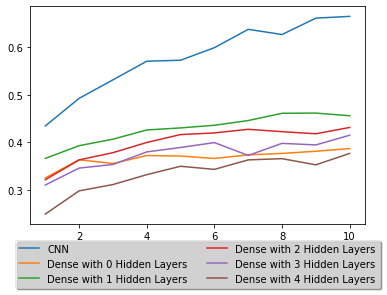

In [ ]:
epochs = np.arange(1,11)
plt.plot(epochs, model_cnn_relu_dropout_history.history['val_accuracy'], label=f"CNN")
plt.plot(epochs, model_dense0_dropout_history.history['val_accuracy'], label=f"Dense with 0 Hidden Layers")
plt.plot(epochs, model_dense1_dropout_history.history['val_accuracy'], label=f"Dense with 1 Hidden Layers")
plt.plot(epochs, model_dense2_dropout_history.history['val_accuracy'], label=f"Dense with 2 Hidden Layers")
plt.plot(epochs, model_dense3_dropout_history.history['val_accuracy'], label=f"Dense with 3 Hidden Layers")
plt.plot(epochs, model_dense4_dropout_history.history['val_accuracy'], label=f"Dense with 4 Hidden Layers")
leg = plt.legend(loc='upper center', ncol=2, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
leg.get_frame().set_alpha(0.5)
plt.show()

We feed these models with augmented data. The accuracy rates of all models are typically increasing as epoch increasing from 1 to 10. Original CNN model with relu activation and suitable dropout rate has the highest validation accuracy among all models. For NN models with 0-4 dense hidden layers of 512 nodes in each hidden layer and relu activation and dropout rate of 0.5, the models with 1 hidden layer performs the best. By adding more hidden layers can deteriorate the validation accuracy: the model even performs worse when the number of hidden layers is 4. It is partially because a dense NN is too complex to be trained such that in first 10 epochs they have poor accuracy rates, i.e. the models were under fitted. However, CNN model simplify the first few layers with convolutional kernel for feature capturing and the weights are shared and sparse.

## 1 (b)

In [ ]:
# Original model CNN with dropout and relu activation in hidden layer
model_cnn_sig_dropout = Sequential()
model_cnn_sig_dropout.add(Conv2D(32, (3, 3), padding='same',
              input_shape=x_train.shape[1:]))
model_cnn_sig_dropout.add(Activation('sigmoid'))
model_cnn_sig_dropout.add(Conv2D(32, (3, 3)))
model_cnn_sig_dropout.add(Activation('sigmoid'))
model_cnn_sig_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_sig_dropout.add(Dropout(0.25))
    
model_cnn_sig_dropout.add(Conv2D(64, (3, 3), padding='same'))
model_cnn_sig_dropout.add(Activation('sigmoid'))
model_cnn_sig_dropout.add(Conv2D(64, (3, 3)))
model_cnn_sig_dropout.add(Activation('sigmoid'))
model_cnn_sig_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_sig_dropout.add(Dropout(0.25))
    
model_cnn_sig_dropout.add(Flatten())
model_cnn_sig_dropout.add(Dense(512))
model_cnn_sig_dropout.add(Activation('sigmoid'))
model_cnn_sig_dropout.add(Dropout(0.5))
model_cnn_sig_dropout.add(Dense(num_classes))
model_cnn_sig_dropout.add(Activation('softmax'))

In [ ]:
model_cnn_sig_dropout.compile(loss='categorical_crossentropy',
              # initiate RMSprop optimizer
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
model_cnn_sig_dropout_history = model_cnn_sig_dropout.fit(data_batches_gen,
                                                            epochs=10,
                                                            validation_data=(x_test, y_test),
                                                            verbose = 0)

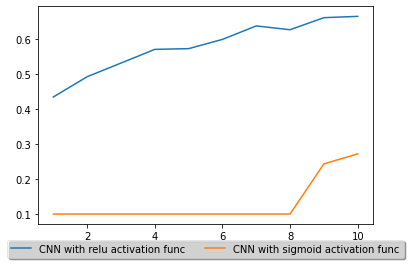

In [ ]:
epochs = np.arange(1,11)
plt.plot(epochs, model_cnn_relu_dropout_history.history['val_accuracy'], label=f"CNN with relu activation func")
plt.plot(epochs, model_cnn_sig_dropout_history.history['val_accuracy'], label=f"CNN with sigmoid activation func")
leg = plt.legend(loc='upper center', ncol=2, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
leg.get_frame().set_alpha(0.5)
plt.show()

CNN with sigmoid activation performs worse than original one especially in first 5 epochs, because in first few layers, the learning rate can be extremely slow since the gradience of sigmoid function is typically very small when input is away from 0. However, the learning rates for weights of node using relu activation remain unchanged as long as it is positive. Also, relu activation function provide another way to dropout nodes such that we can get a trimmed network for each batch of data and finally the averaged network usually have a higher accuracy rate on test dataset.

## 1 (c)

In [22]:
model_cnn_relu_nodrop = Sequential()
model_cnn_relu_nodrop.add(Conv2D(32, (3, 3), padding='same',
              input_shape=x_train.shape[1:]))
model_cnn_relu_nodrop.add(Activation('relu'))
model_cnn_relu_nodrop.add(Conv2D(32, (3, 3)))
model_cnn_relu_nodrop.add(Activation('relu'))
model_cnn_relu_nodrop.add(MaxPooling2D(pool_size=(2, 2)))
    
model_cnn_relu_nodrop.add(Conv2D(64, (3, 3), padding='same'))
model_cnn_relu_nodrop.add(Activation('relu'))
model_cnn_relu_nodrop.add(Conv2D(64, (3, 3)))
model_cnn_relu_nodrop.add(Activation('relu'))
model_cnn_relu_nodrop.add(MaxPooling2D(pool_size=(2, 2)))
    
model_cnn_relu_nodrop.add(Flatten())
model_cnn_relu_nodrop.add(Dense(512))
model_cnn_relu_nodrop.add(Activation('relu'))
model_cnn_relu_nodrop.add(Dense(num_classes))
model_cnn_relu_nodrop.add(Activation('softmax'))

# compile model
model_cnn_relu_nodrop.compile(loss='categorical_crossentropy',
              # initiate RMSprop optimizer
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
# save initialized model
model_cnn_relu_nodrop.save_weights('model_cnn_relu_nodrop.h5')

In [23]:
# Model need to be re-compiled to reset weights
# no dropout
## without data augmentation
model_cnn_relu_nodrop.load_weights('model_cnn_relu_nodrop.h5')
model_cnn_relu_nodrop_history_noaug = model_cnn_relu_nodrop.fit(x_train, y_train,
                                                            batch_size=batch_size,
                                                            epochs=100,
                                                            validation_data=(x_test, y_test),
                                                            shuffle=True,
                                                            verbose = 0)
## with data augmentation
model_cnn_relu_nodrop.load_weights('model_cnn_relu_nodrop.h5')
model_cnn_relu_nodrop_history_aug = model_cnn_relu_nodrop.fit(data_batches_gen,
                        epochs=100,
                        validation_data=(x_test, y_test),
                        verbose = 0)
# dropout
## without data augmentation
model_cnn_relu_dropout.load_weights('model_cnn_relu_dropout.ht')
model_cnn_relu_dropout_history_noaug = model_cnn_relu_dropout.fit(x_train, y_train,
                                                            batch_size=batch_size,
                                                            epochs=100,
                                                            validation_data=(x_test, y_test),
                                                            shuffle=True,
                                                            verbose = 0)
## with data augmentation
model_cnn_relu_dropout.load_weights('model_cnn_relu_dropout.ht')
model_cnn_relu_dropout_history_aug = model_cnn_relu_dropout.fit(data_batches_gen,
                        epochs=100,
                        validation_data=(x_test, y_test),
                        verbose = 0)

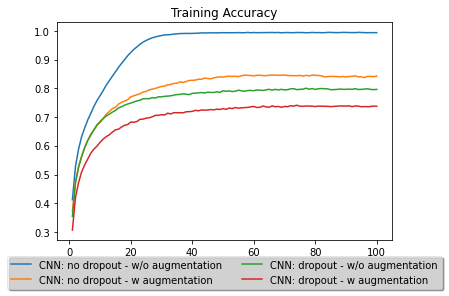

In [24]:
epochs = np.arange(1,101)
plt.plot(epochs, model_cnn_relu_nodrop_history_noaug.history['accuracy'], label=f"CNN: no dropout - w/o augmentation")
plt.plot(epochs, model_cnn_relu_nodrop_history_aug.history['accuracy'], label=f"CNN: no dropout - w augmentation")
plt.plot(epochs, model_cnn_relu_dropout_history_noaug.history['accuracy'], label=f"CNN: dropout - w/o augmentation")
plt.plot(epochs, model_cnn_relu_dropout_history_aug.history['accuracy'], label=f"CNN: dropout - w augmentation")
leg = plt.legend(loc='upper center', ncol=2, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
leg.get_frame().set_alpha(0.5)
plt.title('Training Accuracy')
plt.show()

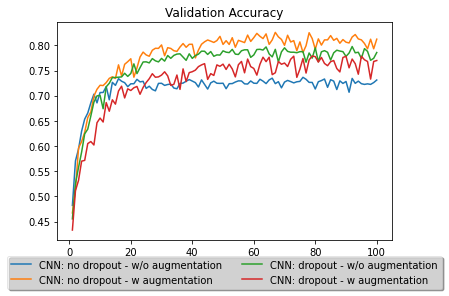

In [25]:
epochs = np.arange(1,101)
plt.plot(epochs, model_cnn_relu_nodrop_history_noaug.history['val_accuracy'], label=f"CNN: no dropout - w/o augmentation")
plt.plot(epochs, model_cnn_relu_nodrop_history_aug.history['val_accuracy'], label=f"CNN: no dropout - w augmentation")
plt.plot(epochs, model_cnn_relu_dropout_history_noaug.history['val_accuracy'], label=f"CNN: dropout - w/o augmentation")
plt.plot(epochs, model_cnn_relu_dropout_history_aug.history['val_accuracy'], label=f"CNN: dropout - w augmentation")
leg = plt.legend(loc='upper center', ncol=2, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
leg.get_frame().set_alpha(0.5)
plt.title('Validation Accuracy')
plt.show()

1. CNN model without dropout and trained without augmented data has the best training accuracy and the worst validation accuracy since it only uses given original data and preserve all possible weights (without dropout). It suffers from overfitting.
2. CNN model with dropout and trained with augmented data has the lowest trainig accuracy and its validation accuracy is not good. The reason could be that we dropped out too many weights or the model was not well trained yet.
3. The other two methods have training accuracy in the middle and are comparable to each other. The CNN model without dropout trained with augmented data has the highest validation accuracy after 20 epochs.